In [10]:
import numpy as np
import matplotlib.pylab as plt
from time import time
import scipy.integrate as sp
sp.solve_ivp()

TypeError: solve_ivp() missing 3 required positional arguments: 'fun', 't_span', and 'y0'

# From the Tiersten paper

# Piezo electric equations for isotropic homogeneous materials

If we look at equations 1.8a, 1.8b from the paper:

$$
\begin{array}{c}
c^{E}{ }_{1 j k 1} u_{k, 11}+e_{11 j} \varphi_{, 11}=\rho \ddot{u}_{j} \qquad &(1.8a) \\
e_{1 k 1} u_{k, 11}-\epsilon_{11}^{S} \varphi_{, 11}=0 \qquad &(1.8b) \\
\end{array}
$$

We can rewrite this to the easier to read 1D forms, where subscript $1$ is in the $z$-direction (I don't index the constants here):

$$
\begin{array}{c}
c^E \frac{\partial^2 u_1}{\partial x_1^2} + e \frac{\partial^2 \phi}{\partial x_1^2} = \rho \frac{\partial^2 u_1}{\partial t^2}  \qquad &(2)\\
e \frac{\partial^2 u_1}{\partial x_1^2} - \epsilon^s \frac{\partial^2 \phi}{\partial x_1^2} = 0 &(3)
\end{array}
$$

and we isolate the $\phi$-term from equation (3):

$$
\frac{\partial^2 \phi}{\partial x_1^2}  = \frac{e}{\epsilon} \frac{\partial^2 u_1}{\partial x_1^2}
$$

And substitute it into equation (2), we obtain:

$$
\rho \frac{\partial^2 u_1}{dt^2} = \left[ c^E + \frac{e}{\epsilon} \right] \frac{\partial^2 u_1}{\partial x_1^2}
$$

Which would then be the differential equation we want to solve. The boundary conditions are given in the Tiersten paper. They are "zero force at the boundaries", $T = 0$ at $x = \pm h$ and an external periodic potential  is applied $\phi = \pm \phi_0 e^{-i\omega t}$ at  $x = \pm h$.


Could we say something like 

$$
u(x,t) = u(x)e^{-i\omega t}
$$

To then write 

$$
\omega^2 u_1 = -\frac{1}{\rho}\left[ c^E + \frac{e}{\epsilon} \right] \frac{\partial^2 u_1}{\partial x_1^2}
$$

Which we can then write as a numerical eigenvalue problem where $u_1$ is discretized using $N$ points with spacing $h$:

\begin{equation}
\omega^2 
\begin{bmatrix}
u_1\\
u_2\\
\vdots\\
u_N\\
\end{bmatrix}
= -\frac{1}{\rho} \left[ c^E + \frac{e}{\epsilon} \right] \frac{1}{2h}
\begin{bmatrix}
?\\
-u_1+2u_2-u_3\\
\vdots\\
-u_{N-2}+2u_{N-1}-u_N\\
?\\
\end{bmatrix} \\
= -\frac{1}{\rho} \left[ c^E + \frac{e}{\epsilon} \right] \frac{1}{2h}
\begin{bmatrix}
? & ? & 0 &   &   & \dots  & & & 0\\
-1 & 2 & -1 & 0 & & \dots & & & 0 \\
 & & &\ddots &&&&&\vdots\\
& & & & \dots &0&-1&2&-1\\ 
& & & &  \dots& &0&? &? 
\end{bmatrix}
\begin{bmatrix}
u_1\\
u_2\\
\vdots\\
u_N\\
\end{bmatrix}
\end{equation}

If the boundary condition is $T = 0$, then $\frac{du}{dx}$ = 0. If it is fixed, we have a dirichlet boundary condition and we can use for the first row $[2, -1, 0,\dots]$ and for the last row $[\dots, 0 , -1,2]$. 

# Space dependent coefficient version

We start with piezo-electric coupled equations

\begin{equation}
T = c^E \frac{\partial u}{\partial x} - e E \qquad (1) \\
D = e \frac{\partial u}{\partial x} + \epsilon^S  E \qquad (2)
\end{equation}

where the physical quantities denoted by the symbols is given in the table below

| Symbol        | Quanitity  | 
| ------------- |-------------|
| $T (Pa)$   |  Stress  | 
| $E (F/C)$   |  Electric field   |
| $c^E (Pa)$ |  Stiffness coefficient measured under constant electric field |
| $u (m)$   |  Mechanical displacement   |
| $e$   |  Piezoelectric coefficient  |
| $D$   |  Electric displacement |
| $\epsilon^S$ | Permitivitty measured under constant strain $S$  | 

We can use the equations

$$
\frac{\partial D}{\partial x} = 0
$$

and the wave equation for acoustic media

$$
\frac{\partial T}{\partial x} = \rho \frac{\partial^2 u}{\partial t^2 }
$$

combined with equation (1) and (2) to obtain

$$
\rho \frac{\partial^2 u}{\partial t^2 }= \frac{\partial c^E }{\partial x}  \frac{\partial u}{\partial x} + c^E \frac{\partial^2 u}{\partial x^2} 
+ \frac{\partial e}{\partial x} \frac{\partial \phi}{\partial x} + e \frac{\partial^2 \phi}{\partial x^2} \qquad (3)\\
\frac{\partial e}{\partial x} \frac{\partial u}{\partial x} + e \frac{\partial^2 u}{\partial x^2} - \left(\frac{\partial \epsilon^S}{\partial x} \frac{\partial \phi}{\partial x} + \epsilon^S \frac{\partial^2 \phi}{\partial x^2} \right)= 0 \qquad (4)\\
$$

where it was used that the electric field is minus the gradient of the potential $\phi$ 
and that all quantities, including constants and coefficients, are dependent on $x$.

We can now rewrite equations (3) and (4) using the finite difference approximation, where we use the central difference formula. For the first derivative this is given by

$$
\frac{\partial f_i}{\partial x} \approx \frac{f_{i+1}-f_{i-1}}{2h},
$$

and for the second derivative it is given as

$$
\frac{\partial^2 f_i}{\partial x^2} \approx \frac{-f_{i+1} + 2f_{i} -f_{i-1}}{h^2}
$$

where $h$ is the discretization size and $f_i$ is the value of $f(x)$ at the $i^{th}$ point.

Using this we obtain the finite difference equations of equations (3) and (4):

$$
\rho_i \frac{\partial^2 u_i}{\partial t^2 }= c^E_{i,x}  \frac{u_{i+1}-u_{i-1}}{2h} + c^E_i \frac{-u_{i+1}+2u_i-u_{i-1}}{h^2} 
+ e_{i,x} \frac{\phi_{i+1}-\phi_{i-1}}{2h} + e_i \frac{-\phi_{i+1}+2\phi_{i}-\phi_{i-1}}{h^2} \qquad (5)\\
e_{i,x} \frac{u_{i+1}-u_{i-1}}{2h} + e_i \frac{-u_{i+1}+2u_i-u_{i-1}}{h^2} - \left(\epsilon_{i,x} \frac{\phi_{i+1}-\phi_{i-1}}{2h} + \epsilon_i^S \frac{-\phi_{i+1}+2\phi_{i}-\phi_{i-1}}{h^2} \right)= 0 \qquad (6)\\
$$

where we denote the derivative with respect to $x$ of the coefficients $c^E, e, \epsilon^S$ by placing it after the comma. We can rewrite equations (5) and (6) in a form where all the discretized variables only appear no more than once on each side of the equation:

$$
\rho_i \frac{\partial^2 u_i}{\partial t^2 } = u_{i-1} \left(-\frac{c^E_{i,x}}{2h} - \frac{c^E_i}{h^2}\right) + u_i \left(  \frac{2c^E_i}{h^2} \right) + u_{i+1} \left(\frac{c^E_{i,x}}{2h} - \frac{c^E_i}{h^2}\right) + \phi_{i-1} \left(- \frac{e_{i,x}}{2h} - \frac{e_i}{h^2} \right) + \phi_i \left(\frac{2e_i}{h^2}\right) + \phi_{i+1} \left( \frac{e_{i,x}}{2h} - \frac{e_i}{h^2} \right)  \quad(7)\\
u_{i-1} \left( -\frac{e_{i,x}}{2h} - \frac{e_i}{h^2} \right) + u_i \left(\frac{2e_i}{h^2} \right) + u_{i+1} \left( \frac{e_{i,x}}{2h} - \frac{e_i}{h^2} \right) + \phi_{i-1} \left(+\frac{\epsilon^S_{i,x}}{2h} + \frac{\epsilon^S_i}{h^2} \right) + \phi_i \left(-\frac{2\epsilon^S_i}{h^2}\right) + \phi_{i+1} \left( -\frac{\epsilon^S_{i,x}}{2h} + \frac{\epsilon^S_i}{h^2} \right) = 0 \qquad(8)
$$

We use a free boundary condition for the mechanical displacement, which means that its derivative is zero there. Numerically this means that:

$$
u_{N-1} - u_{N-2}=0 \quad \rightarrow \quad u_{N-1} = u_{N-2}\\
u_1 - u_{0} = 0 \quad \rightarrow \quad u_0 = u_1 \\
$$ 

For the potential we take that its value at the boundary is 0

$$
\phi_0 = 0 \\
\phi_{N-1} = 0 \\
$$ 

So the equations we obtain for $i = 1,2, N-3, N-2$ are

$i = 1$:

$$
\frac{\partial^2 u_1}{\partial t^2 } = u_{1} \left(-\frac{c^E_{1,x}}{2h} + \frac{c^E_1}{h^2} \right) + u_{2} \left(\frac{c^E_{1,x}}{2h} - \frac{c^E_1}{h^2}\right) + \phi_1 \left(\frac{2e_1}{h^2}\right) + \phi_{2} \left( \frac{e_{1,x}}{2h} - \frac{e_1}{h^2} \right) \\
u_{1} \left( -\frac{e_{1,x}}{2h} - \frac{e_1}{h^2} + \frac{2e_1}{h^2} \right) + u_{2} \left( \frac{e_{1,x}}{2h} - \frac{e_1}{h^2} \right) + \phi_1 \left(-\frac{2\epsilon^S_1}{h^2}\right) + \phi_{2} \left( -\frac{\epsilon^S_{1,x}}{2h} + \frac{\epsilon^S_1}{h^2} \right) = 0
$$

$i=2$:

$$
\frac{\partial^2 u_2}{\partial t^2 } = u_{1} \left(-\frac{c^E_{2,x}}{2h} - \frac{c^E_2}{h^2}\right) + u_2 \left(  \frac{2c^E_2}{h^2} \right) + u_{3} \left(\frac{c^E_{2,x}}{2h} - \frac{c^E_2}{h^2}\right) + \phi_{1} \left(- \frac{e_{2,x}}{2h} - \frac{e_2}{h^2} \right) + \phi_2 \left(\frac{2e_2}{h^2}\right) + \phi_{3} \left( \frac{e_{2,x}}{2h} - \frac{e_2}{h^2} \right) \\
u_{1} \left( -\frac{e_{2,x}}{2h} - \frac{e_2}{h^2} \right) + u_2 \left(\frac{2e_2}{h^2} \right) + u_{3} \left( \frac{e_{2,x}}{2h} - \frac{e_2}{h^2} \right) + \phi_{1} \left(+\frac{\epsilon^S_{2,x}}{2h} + \frac{\epsilon^S_2}{h^2} \right) + \phi_2 \left(-\frac{2\epsilon^S_2}{h^2}\right) + \phi_{3} \left( -\frac{\epsilon^S_{2,x}}{2h} + \frac{\epsilon^S_2}{h^2} \right) = 0
$$

$i=N-3$

$$
\frac{\partial^2 u_{N-3}}{\partial t^2 } = u_{N-4} \left(-\frac{c^E_{N-3,x}}{2h} - \frac{c^E_{N-3}}{h^2}\right) + u_i \left(  \frac{2c^E_{N-3}}{h^2} \right) + u_{N-2} \left(\frac{c^E_{N-3,x}}{2h} - \frac{c^E_{N-3}}{h^2}\right) + \phi_{N-4} \left(- \frac{e_{N-4,x}}{2h} - \frac{e_{N-3}}{h^2} \right) + \phi_{N-3} \left(\frac{2e_{N-3}}{h^2}\right) + \phi_{N-2} \left( \frac{e_{N-3,x}}{2h} - \frac{e_{N-3}}{h^2} \right) \\
u_{N-4} \left( -\frac{e_{N-3,x}}{2h} - \frac{e_N-3}{h^2} \right) + u_{N-3} \left(\frac{2e_{N-3}}{h^2} \right) + u_{N-2} \left( \frac{e_{N-3,x}}{2h} - \frac{e_{N-3}}{h^2} \right) + \phi_{N-4} \left(+\frac{\epsilon^S_{N-3,x}}{2h} + \frac{\epsilon^S_{N-3}}{h^2} \right) + \phi_{N-3} \left(-\frac{2\epsilon^S_{N-3}}{h^2}\right) + \phi_{N-2} \left( -\frac{\epsilon^S_{{N-3},x}}{2h} + \frac{\epsilon^S_{N-3}}{h^2} \right) = 0
$$

$i=N-2$

$$
\frac{\partial^2 u_{N-2}}{\partial t^2 } = u_{N-3} \left(-\frac{c^E_{N-2,x}}{2h} - \frac{c^E_N-2}{h^2}\right) + u_{N-2} \left( \frac{2c^E_i}{h^2} + \frac{c^E_{N-2,x}}{2h} - \frac{c^E_{N-2}}{h^2}\right) + \phi_{N-3} \left(- \frac{e_{N-2,x}}{2h} - \frac{e_N-2}{h^2} \right) + \phi_{N-2} \left(\frac{2e_i}{h^2}\right) \\
u_{N-3} \left( -\frac{e_{N-2,x}}{2h} - \frac{e_{N-2}}{h^2} \right) + u_{N-2} \left(\frac{e_{N-2}}{h^2} + \frac{e_{N-2,x}}{2h} \right) + \phi_{N-3} \left(\frac{\epsilon^S_{N-2,x}}{2h} + \frac{\epsilon^S_{N-2}}{h^2} \right) + \phi_{N-2} \left(-\frac{2\epsilon^S_{N-2}}{h^2}\right) = 0
$$

$$
\begin{pmatrix}
\left(-\frac{c^E_{1,x}}{2h} - \frac{c^E_1}{h^2} + \frac{2c^E_1}{h^2} \right) & \left(\frac{c^E_{1,x}}{2h} - \frac{c^E_1}{h^2}\right) & 0 & 0 & \dots & 0 & 0 & 0 & 0 & \left(\frac{2e_1}{h^2}\right) & \left( \frac{e_{1,x}}{2h} - \frac{e_1}{h^2} \right) & 0 & 0 &\dots & 0 & 0 & 0 & 0  \\
\left(-\frac{c^E_{2,x}}{2h} - \frac{c^E_2}{h^2}\right) & \left( \frac{2c^E_2}{h^2} \right) & \left(\frac{c^E_{2,x}}{2h} - \frac{c^E_2}{h^2}\right) & 0 & \dots & 0 & 0 & 0 &0 & \left(- \frac{e_{2,x}}{2h} - \frac{e_2}{h^2} \right) & \left(\frac{2e_2}{h^2}\right) &  \left( \frac{e_{2,x}}{2h} - \frac{e_2}{h^2} \right) & 0 &\dots & 0 & 0 & 0 & 0 \\
&&&&&&&& \ddots &&&&&&&&\\
0&0&0&0& \dots & 0 &\left(-\frac{c^E_{N-3,x}}{2h} - \frac{c^E_{N-3}}{h^2}\right) & \left(  \frac{2c^E_{N-3}}{h^2} \right) & \left(\frac{c^E_{N-3,x}}{2h} - \frac{c^E_{N-3}}{h^2}\right) & 0 & 0 & 0 & 0 & \dots & 0 & \left(- \frac{e_{N-4,x}}{2h} - \frac{e_{N-3}}{h^2} \right) &  \left(\frac{2e_{N-3}}{h^2}\right) & \left( \frac{e_{N-3,x}}{2h} - \frac{e_{N-3}}{h^2} \right) \\
0&0&0&0&\dots&0&0& \left(-\frac{c^E_{N-2,x}}{2h} - \frac{c^E_N-2}{h^2}\right) & \left( \frac{2c^E_i}{h^2} + \frac{c^E_{N-2,x}}{2h} - \frac{c^E_{N-2}}{h^2}\right) &0&0&0&0&\dots&0&0& \left(- \frac{e_{N-2,x}}{2h} - \frac{e_N-2}{h^2} \right) &  \left(\frac{2e_i}{h^2}\right) \\
 \left( -\frac{e_{1,x}}{2h} - \frac{e_1}{h^2} + \frac{2e_1}{h^2} \right) &  \left( \frac{e_{1,x}}{2h} - \frac{e_1}{h^2} \right) &0&0&\dots&0&0&0&0&  \left(-\frac{2\epsilon^S_1}{h^2}\right) &  \left( -\frac{\epsilon^S_{1,x}}{2h} + \frac{\epsilon^S_1}{h^2} \right) & 0 & 0 & \dots & 0 & 0 & 0 &0 \\
 \left( -\frac{e_{2,x}}{2h} - \frac{e_2}{h^2} \right) &  \left(\frac{2e_2}{h^2} \right) &  \left( \frac{e_{2,x}}{2h} - \frac{e_2}{h^2} \right) &0 & \dots &0&0&0&0&  \left(+\frac{\epsilon^S_{2,x}}{2h} + \frac{\epsilon^S_2}{h^2} \right) &  \left(-\frac{2\epsilon^S_2}{h^2}\right) & \left( -\frac{\epsilon^S_{2,x}}{2h} + \frac{\epsilon^S_2}{h^2} \right) & 0 &\dots &0&0&0&0 \\
&&&&&&&& \ddots &&&&&&&&\\
0&0&0&0&\dots&0& \left( -\frac{e_{N-3,x}}{2h} - \frac{e_N-3}{h^2} \right) &  \left(\frac{2e_{N-3}}{h^2} \right) &  \left( \frac{e_{N-3,x}}{2h} - \frac{e_{N-3}}{h^2} \right) &0&0&0&0&\dots&0&  \left(+\frac{\epsilon^S_{N-3,x}}{2h} + \frac{\epsilon^S_{N-3}}{h^2} \right) &  \left(-\frac{2\epsilon^S_{N-3}}{h^2}\right) &  \left( -\frac{\epsilon^S_{{N-3},x}}{2h} + \frac{\epsilon^S_{N-3}}{h^2} \right)\\
0&0&0&0&\dots&0&0& \left( -\frac{e_{N-2,x}}{2h} - \frac{e_{N-2}}{h^2} \right) &  \left(\frac{2e_{N-2}}{h^2} + \frac{e_{N-2,x}}{2h} - \frac{e_{N-2}}{h^2} \right) &0&0&0&0&\dots&0&0& \left(+\frac{\epsilon^S_{N-2,x}}{2h} + \frac{\epsilon^S_{N-2}}{h^2} \right) &  \left(-\frac{2\epsilon^S_{N-2}}{h^2}\right) \\
\end{pmatrix}
\begin{pmatrix}
u_1 \\
u_2 \\
u_3 \\
u_4 \\
\vdots \\
u_{N-5}\\
u_{N-4} \\
u_{N-3} \\
u_{N-2} \\
\phi_1 \\
\phi_2 \\
\phi_3 \\
\phi_4\\
\vdots \\
\phi_{N-5}\\
\phi_{N-4} \\
\phi_{N-3} \\
\phi_{N-2} \\
\end{pmatrix}
= 
\begin{pmatrix}
\rho_1 \frac{\partial}{\partial} u_1 \\
\rho_2 \frac{\partial}{\partial} u_2\\
\rho_3 \frac{\partial}{\partial}u_3 \\
\rho_4 \frac{\partial}{\partial}u_4 \\
\vdots \\
\rho_{N-5} \frac{\partial}{\partial}u_{N-5} \\
\rho_{N-4}\frac{\partial}{\partial} u_{N-4} \\
\rho_{N-3} \frac{\partial}{\partial}u_{N-3} \\
\rho_{N-2} \frac{\partial}{\partial}u_{N-2} \\
0 \\
0 \\
0 \\
0 \\
\vdots \\
0 \\
0 \\
0 \\
0 \\
\end{pmatrix}
$$

This is the generalized eigenvalue problem we want to solve. We can first simplify assuming that we can seperate the variables as $u(x,t) = u(x)e^{-i \omega t}$. We then obtain 

$$
-\rho_i \omega^2 u_i = u_{i-1} \left(-\frac{c^E_{i,x}}{2h} - \frac{c^E_i}{h^2}\right) + u_i \left(  \frac{2c^E_i}{h^2} \right) + u_{i+1} \left(\frac{c^E_{i,x}}{2h} - \frac{c^E_i}{h^2}\right) + \phi_{i-1} \left(- \frac{e_{i,x}}{2h} - \frac{e_i}{h^2} \right) + \phi_i \left(\frac{2e_i}{h^2}\right) + \phi_{i+1} \left( \frac{e_{i,x}}{2h} - \frac{e_i}{h^2} \right)  \quad \\
u_{i-1} \left( -\frac{e_{i,x}}{2h} - \frac{e_i}{h^2} \right) + u_i \left(\frac{2e_i}{h^2} \right) + u_{i+1} \left( \frac{e_{i,x}}{2h} - \frac{e_i}{h^2} \right) + \phi_{i-1} \left(+\frac{\epsilon^S_{i,x}}{2h} + \frac{\epsilon^S_i}{h^2} \right) + \phi_i \left(-\frac{2\epsilon^S_i}{h^2}\right) + \phi_{i+1} \left( -\frac{\epsilon^S_{i,x}}{2h} + \frac{\epsilon^S_i}{h^2} \right) = 0
$$

These equations can be rewritten in matrix form 

$$
- \omega^2 \pmb{\rho} \circ \mathbf u = A \mathbf{u} + B \pmb{\phi} \quad (9) \\
C  \mathbf{u} + D\pmb{\phi} = \mathbf{0}  \qquad (10)\\
$$

where the matrices $A, B, C, D$ are given as:

$$
A = \begin{pmatrix}
-\frac{c^E_{1,x}}{2h} + \frac{c^E_1}{h^2}  & \frac{c^E_{1,x}}{2h} - \frac{c^E_1}{h^2} & 0 & 0&\dots & 0 & 0 & 0&0\\
-\frac{c^E_{2,x}}{2h} - \frac{c^E_2}{h^2} &  \frac{2c^E_2}{h^2}  & \frac{c^E_{2,x}}{2h} - \frac{c^E_2}{h^2} & 0 & \dots & 0 & 0 & 0&0\\
&&&& \ddots &&&&\\
0&0&0&0& \dots  &0 &-\frac{c^E_{N-3,x}}{2h} - \frac{c^E_{N-3}}{h^2} & \frac{2c^E_{N-3}}{h^2} & \frac{c^E_{N-3,x}}{2h} - \frac{c^E_{N-3}}{h^2}\\
0&0&0&0&\dots&0&0& -\frac{c^E_{N-2,x}}{2h} - \frac{c^E_{N-2}}{h^2} & \frac{c^E_{N-2}}{h^2} + \frac{c^E_{N-2,x}}{2h}\\
\end{pmatrix} 
$$

$$
B = \begin{pmatrix}
\frac{2e_1}{h^2} & \frac{e_{1,x}}{2h} - \frac{e_1}{h^2}  & 0 & 0 &\dots & 0 & 0 & 0 & 0  \\
- \frac{e_{2,x}}{2h} - \frac{e_2}{h^2}  & \frac{2e_2}{h^2} &  \frac{e_{2,x}}{2h} - \frac{e_2}{h^2}  & 0 &\dots & 0 & 0 & 0 & 0 \\
&&&& \ddots &&&&\\
0 & 0 & 0 & 0 & \dots & 0 & - \frac{e_{N-3,x}}{2h} - \frac{e_{N-3}}{h^2}  &  \frac{2e_{N-3}}{h^2} &  \frac{e_{N-3,x}}{2h} - \frac{e_{N-3}}{h^2}  \\
0&0&0&0&\dots&0&0& - \frac{e_{N-2,x}}{2h} - \frac{e_N-2}{h^2}  &  \frac{2e_i}{h^2}\\
\end{pmatrix}
$$



$$
C = \begin{pmatrix}
 -\frac{e_{1,x}}{2h} + \frac{e_1}{h^2}  & \frac{e_{1,x}}{2h} - \frac{e_1}{h^2} &0&0&\dots&0&0&0&0\\
-\frac{e_{2,x}}{2h} - \frac{e_2}{h^2}  &  \frac{2e_2}{h^2} & \frac{e_{2,x}}{2h} - \frac{e_2}{h^2} &0 & \dots &0&0&0&0 \\
 &&&& \ddots &&&&\\
 0&0&0&0&\dots&0& -\frac{e_{N-3,x}}{2h} - \frac{e_{N-3}}{h^2}  & \frac{2e_{N-3}}{h^2} &  \frac{e_{N-3,x}}{2h} - \frac{e_{N-3}}{h^2}\\
0&0&0&0&\dots&0&0& -\frac{e_{N-2,x}}{2h} - \frac{e_{N-2}}{h^2}  &  \frac{e_{N-2}}{h^2} + \frac{e_{N-2,x}}{2h}\\
\end{pmatrix}
$$

$$
D = \begin{pmatrix}
-\frac{2\epsilon^S_1}{h^2} &  -\frac{\epsilon^S_{1,x}}{2h} + \frac{\epsilon^S_1}{h^2}  & 0 & 0 & \dots & 0 & 0 & 0 &0 \\
\frac{\epsilon^S_{2,x}}{2h} + \frac{\epsilon^S_2}{h^2} &  -\frac{2\epsilon^S_2}{h^2} &  -\frac{\epsilon^S_{2,x}}{2h} + \frac{\epsilon^S_2}{h^2} & 0 &\dots &0&0&0&0 \\
&&&& \ddots &&&&\\
0&0&0&0&\dots&0&  \frac{\epsilon^S_{N-3,x}}{2h} + \frac{\epsilon^S_{N-3}}{h^2} & -\frac{2\epsilon^S_{N-3}}{h^2}&   -\frac{\epsilon^S_{{N-3},x}}{2h} + \frac{\epsilon^S_{N-3}}{h^2}\\
0&0&0&0&\dots&0&0& \frac{\epsilon^S_{N-2,x}}{2h} + \frac{\epsilon^S_{N-2}}{h^2}  &  -\frac{2\epsilon^S_{N-2}}{h^2} \\
\end{pmatrix}
$$

We can then extract $\pmb{\phi}$ from equation (10): 

$$
\pmb{\phi} = -D^{-1} C \mathbf{u}
$$

and substitute it into equation (9), to obtain:

$$
\omega^2 \mathbf{u} = (BD^{-1}C- A) \mathbf{u} \circ \pmb{\rho}^{-1}
$$


### Coding out the space dependent numerical solutions to the eigenvalue problem

In [101]:
#WHAT DO WE NEED?

#Functions which describe the coefficients dependent on space 
#Will take constant value to check first
def permitivitty(eps_r, x):
    eps0 = 8.85419e-12 #[F/m] (rounded to 6 singificant digits)
    eps = eps_r * eps0
    return eps
def permitivitty_prime(eps_r, x):
    eps0 = 8.85419e-12 #[F/m] (rounded to 6 singificant digits)
    return 0

def piezoCoefficient(x):
    e = 1 #C/m^2
    return e

def piezoCoefficient_prime(x):
    return 0

def stiffness(x):
    return 1 #[Pa]
def stiffness_prime(x):
    return 0

def density(x):
    return 3e3 #[kg/m^3]

#vectorize all functions
permitivitty = np.vectorize(permitivitty)
permitivitty_prime = np.vectorize(permitivitty_prime)
piezoCoefficient = np.vectorize(piezoCoefficient)
piezoCoefficient_prime = np.vectorize(piezoCoefficient_prime)
stiffness = np.vectorize(stiffness)
stiffness_prime = np.vectorize(stiffness_prime)
density = np.vectorize(density)

#Number of points for discretization
N = 1000 
    
#Range
x0 = 0 
x1 = 10

#Step size
h = (x1 - x0) / (N-1)

A
[[ 9801. -9801.     0. ...     0.     0.     0.]
 [-9801. 19602. -9801. ...     0.     0.     0.]
 [    0. -9801. 19602. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ... 19602. -9801.     0.]
 [    0.     0.     0. ... -9801. 19602. -9801.]
 [    0.     0.     0. ...     0. -9801.  9801.]]
B
[[19602. -9801.     0. ...     0.     0.     0.]
 [-9801. 19602. -9801. ...     0.     0.     0.]
 [    0. -9801. 19602. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ... 19602. -9801.     0.]
 [    0.     0.     0. ... -9801. 19602. -9801.]
 [    0.     0.     0. ...     0. -9801. 19602.]]
C
[[ 9801. -9801.     0. ...     0.     0.     0.]
 [-9801. 19602. -9801. ...     0.     0.     0.]
 [    0. -9801. 19602. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ... 19602. -9801.     0.]
 [    0.     0.     0. ... -9801. 19602. -9801.]
 [    0.     0.     0. ...     0. -9801.  9801.]]
D
[[-19602.   9801.      0. ...      0.      0.      0.]
 [  9801. -19602.   9801. ...      0.

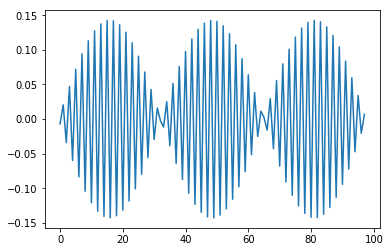

In [120]:
#compute eigenfrequencies and modes
def find_solution(interval, N, eps_r, rho, eps, eps_p, e, e_p, c, c_p):
    '''
    Input
    ----------------------
    interval:  tuple 
            beginning and end coordinates
            
    N:      integer
            number of points in discretization
    
    eps_r:  float
            relative permitivitty
            
    rho:    callable
            Density. Should take parameter x
             
    eps:    callable
            permitivitty dependent on space. Should take parameter x and relative permitivitty eps_r
          
    eps_p:  callable
            derivative of permitivitty. Should take parameter x and relative permitivitty eps_r
    
    e:      callable 
            piezo electric coefficient. Should take paremeter x.
            
    e_p:    callable
            derivative of piezo electric coefficient. Should take parameter x.
    
    c:      callable
            stiffness coefficient. Should take parameter x.
            
    c_p:    callable
            Derivative of stiffness coefficient. Should take parameter x.
    
    Output
    --------------------
    Eigenfrequencies and eigenmodes
            
    '''
    #vectorize the input functions
    eps = np.vectorize(eps)
    eps_p = np.vectorize(eps_p)
    e = np.vectorize(e)
    e_p = np.vectorize(e_p)
    c = np.vectorize(c)
    c_p = np.vectorize(c_p)
    rho = np.vectorize(rho)
    
    #make x array
    x0, x1 = interval
    x = np.linspace(x0,x1,N)
    dx = x[1] - x[0]
    
    #make the arrays with coefficients
    rho_arr = rho(x[1:-1])
    eps_arr = eps(eps_r,x[1:-1])
    eps_p_arr = eps_p(eps_r,x[1:-1])
    e_arr = e(x[1:-1])
    e_p_arr = e_p(x[1:-1])
    c_arr = c(x[1:-1])
    c_p_arr = c_p(x[1:-1])
    
    #Make the matrices 
    #matrix A
    A0 = 2 * c_arr / dx**2 #main diagonal
    A0[0] = c_arr[0] / dx**2 - c_p_arr[0] / (2*dx) #first point B.C.
    A0[-1] = c_arr[-1] / dx**2 - c_p_arr[-1] / (2*dx) #first point B.C. #last point B.C.
    AR = c_p_arr[:-1] / (2*dx) - c_arr[:-1] / (dx**2) #Right diagonal
    AL = -c_p_arr[1:] / (2*dx) - c_arr[1:] / (dx**2) #left diagonal
    A = np.diag(A0) + np.diag(AR, k=1) + np.diag(AL, k=-1)
    
    #matrix C (similar to A)
    C0 = 2 * e_arr / dx**2 #main diagonal
    C0[0] = e_arr[0] / dx**2 - e_p_arr[0] / (2*dx) #first point B.C.
    C0[-1] = e_arr[-1] / dx**2 - e_p_arr[-1] / (2*dx) #last point B.C.
    CR = e_p_arr[:-1] / (2*dx) - e_arr[:-1] / (dx**2) #Right diagonal
    CL = -e_p_arr[1:] / (2*dx) - e_arr[1:] / (dx**2) #left diagonal
    C = np.diag(C0) + np.diag(CR, k=1) + np.diag(CL, k=-1)
    
    #matrix B
    B0 = 2 * e_arr / dx**2 #main diagonal
    BR = e_p_arr[:-1] / (2*dx) - e_arr[:-1] / (dx**2) #Right diagonal
    BL = -e_p_arr[1:] / (2*dx) - e_arr[1:] / (dx**2) #left diagonal
    B = np.diag(B0) + np.diag(BR, k=1) + np.diag(BL, k=-1)
      
    #matrix D (similar to B)
    D0 = -2 * e_arr / dx**2 #main diagonal
    DR = -e_p_arr[:-1] / (2*dx) + e_arr[:-1] / (dx**2) #Right diagonal
    DL = e_p_arr[1:] / (2*dx) + e_arr[1:] / (dx**2) #left diagonal
    D = np.diag(D0) + np.diag(DR, k=1) + np.diag(DL, k=-1)
    Dinv = np.linalg.inv(D)
    
    #Find the matrix of the eigenvalue problem
    M = 1/rho_arr * (np.dot(B,np.dot(Dinv,C)) - A)
    
    print("A")
    print(np.round(A, decimals = 3))
    print("B")
    print(np.round(B, decimals = 3))
    print("C")
    print(np.round(C, decimals = 3))
    print("D")
    print(np.round(D, decimals = 3))
    print("M")
    print(np.round(M, decimals = 3))
    
    #find the squared eigenvalues and eigenvectors
    eigvals, eigvectors = np.linalg.eigh(M)
    
    #sort the eigenfrequencies
    eigfreq_sorted = np.sort(eigvals)
    
    #sort the eigenmodes
    eigvectors_sorted = eigvectors[:,np.argsort(eigvals)]
    
    return eigfreq_sorted, eigvectors_sorted

eigvals, eigmodes = find_solution([0,1],100,1,density,permitivitty, permitivitty_prime, \
              piezo_coefficient, piezo_coefficient_prime, stiffness, stiffness_prime)


#plt.plot(eigvals)
plt.plot(eigmodes[:,2])


# Solving the homogenous coupled equation 

In [92]:
#denisty of the material
rho = 1000
c = 1
e = 1
eps = 1

#Number of points 
N = 1000

#Range 
x0 = 0 
x1 = 1

x = np.linspace(x0,x1,N)

#Determine the spacing
dx = x[1] - x[0]

In [139]:
#Make the matrix
M = np.zeros((N,N))

#We want the -1, 2, -1 on each line to get the central derivatives
#For now I took the dirichlet boundary condition 
M = -2* np.eye(N) +np.eye(N, k=-1) + np.eye(N,k=1)
#M[0,0] = -1
#M[-1,-1] = -1

#with the prefactor
M *= -1/rho * (c + e/eps) / (2*dx)

print(M)

[[ 1.998 -0.999  0.    ...  0.     0.     0.   ]
 [-0.999  1.998 -0.999 ...  0.     0.     0.   ]
 [ 0.    -0.999  1.998 ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ...  1.998 -0.999  0.   ]
 [ 0.     0.     0.    ... -0.999  1.998 -0.999]
 [ 0.     0.     0.    ...  0.    -0.999  1.998]]


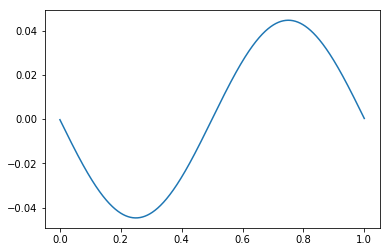

In [140]:
#finding the frequencies 
eigvalues, eigvectors = np.linalg.eigh(M)


#plot an eigenmodes
plt.plot(x, eigvectors[:,1])
#plt.plot(eigvalues)

# Solving the acoustic wave equation numerically

The acoustic wave equation is given by 

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}
$$

If we take the stationary modes, we obtain

$$
-\omega^2 u = c^2 \frac{\partial^2 u}{\partial x^2}
$$

If we take $u = 0$ at the boundaries, we can use the 1D Laplacian

In [7]:
#velocity c
c = 0.1

#Number of points 
N = 1000

#Range 
x0 = 0 
x1 = 10

#create x array
x = np.linspace(x0,x1,N)

#Determine the spacing
dx = x[1] - x[0]

In [8]:
#inbetween we want the -1, 0, -1 on each line to get the central derivatives
M = np.eye(N,k=-1) - 2*np.eye(N)+np.eye(N,k=1)

#Multiply by prefactor
M*= -c**2/dx**2

print(M)

[[199.6002 -99.8001   0.     ...   0.       0.       0.    ]
 [-99.8001 199.6002 -99.8001 ...   0.       0.       0.    ]
 [  0.     -99.8001 199.6002 ...   0.       0.       0.    ]
 ...
 [  0.       0.       0.     ... 199.6002 -99.8001   0.    ]
 [  0.       0.       0.     ... -99.8001 199.6002 -99.8001]
 [  0.       0.       0.     ...   0.     -99.8001 199.6002]]


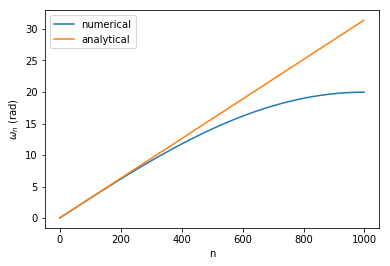

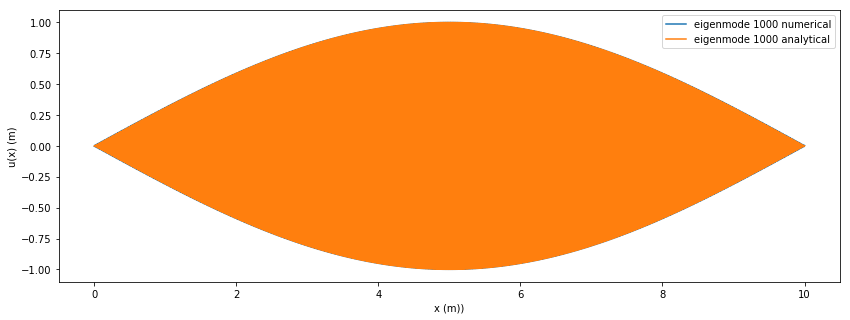

In [9]:
#finding the frequencies 
eigvalues, eigvectors = np.linalg.eigh(M)

#eigenvalues are omega^2
omegas = np.sort(np.sqrt(eigvalues))

#Make amplitude 1, this is undetermined by the equations, so allowed
eigvectors/= -np.max(eigvectors)

#plot the eigenvalues
plt.plot(omegas, label = "numerical")
plt.plot(np.arange(1,len(omegas))*c*np.pi/(x1-x0), label = "analytical")
plt.xlabel("n")
plt.ylabel("$\omega_n$ (rad)")
plt.legend()
plt.show()

#plot an eigenmodes
eigvectors_sort = eigvectors[:,np.argsort(omegas)] 
k = 1000 #plotting index
plt.figure(figsize = (14,5))
plt.plot(x, eigvectors[:,k-1],label = f"eigenmode {k} numerical")
plt.plot(x, np.sin(k* np.pi/(x1-x0)*x), label = f"eigenmode {k} analytical")
plt.xlabel("x (m))")
plt.ylabel("u(x) (m)")
plt.legend()
plt.show()

# solving the potential equation

## first the homogoneous case

This is not really an eigenvalue problem right?

N_iter 8263 delta_max 9.996551e-06
Total running time: 0.03 min
Code speed: 4414.3 iterations per second


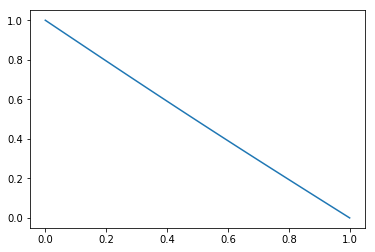

In [11]:
#Number of points 
N = 100

#Range 
x0 = 0 
x1 = 1

#create x array
x = np.linspace(x0,x1,N)

#Applied boundary potential phi0
phi0 = 1

#boundaries of potential at phi0 and 0 (ground)
phi = np.zeros(N)
phi[0] = phi0
phinew = phi.copy()

#make a fixed array 
fixed = np.zeros(N)
fixed[0] = 1
fixed[-1] = 1

#set accuracy
target_accuracy = 1e-5


# Keep track of the biggest update. 
# When this is smaller than our target accuracy, 
# we will stop iterating
delta_max = 1
delta_max_list = []

t1 = time()
while delta_max > target_accuracy:
    for i in range(N):
            if fixed[i]:
                phinew[i] = phi[i]
            else:
                phinew[i] = (phi[i+1] + phi[i-1]) / 2
    delta_max = np.max(np.abs(phinew-phi))
    delta_max_list.append(delta_max)
    print("N_iter %d delta_max %e\r" % (len(delta_max_list), delta_max), end='')
    # Now that we're done, phi becomes phinew. A sneaky trick: if we swap the two, 
    # we don't need to copy the whole array! 
    phi,phinew = phinew,phi
t2 = time()

print("\nTotal running time: %.2f min" % ((t2-t1)/60))
print("Code speed: %.1f iterations per second" %(len(delta_max_list)/(t2-t1)))

answer_13_1a_1 = phi.copy()
answer_13_1a_2 = delta_max_list.copy()

plt.plot(x,phi)
plt.show()

Straight line, could have expected that